In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
import requests
from bs4 import BeautifulSoup
import nltk

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.imdb.com/title/tt15398776/reviews/?ref_=tt_ql_2'
url2 = 'https://www.imdb.com/title/tt15398776/reviews/_ajax'
params = {
    'ref_': 'undefined',
    'paginationKey': ''
}
list_review = []
with requests.Session() as s:
    s.headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36'
    res = s.get(url)
    while True:
        soup = BeautifulSoup(res.text, "lxml")
        for item in soup.select(".review-container"):
            text_review = item.select_one(".text.show-more__control").get_text(strip=True)
            list_review.append({'Review': text_review})
        try:
            pagination_key = soup.select_one(".load-more-data[data-key]").get("data-key")
        except AttributeError:
            break
        params['paginationKey'] = pagination_key
        res = s.get(url2, params=params)
df = pd.DataFrame(list_review) # Create a DataFrame from the list of reviews.
print(df)
df.to_csv('imdb.csv', index=False) #Save the DataFrame to a CSV file.

                                                 Review
0     One of the most anticipated films of the year ...
1     You'll have to have your wits about you and yo...
2     I'm a big fan of Nolan's work so was really lo...
3     "Oppenheimer" is a biographical thriller film ...
4     This movie is just... wow! I don't think I hav...
...                                                 ...
3545  The movie's main issue is that it didn't need ...
3546  Again the usa is shown as the good boys fighti...
3547  Had so high expectations. Wanted something spe...
3548  An honest view from a good fan of Nolan's work...
3549  I discovered this film to be excessively intri...

[3550 rows x 1 columns]


In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
df.head()

,Review
0,One of the most anticipated films of the year ...
1,You'll have to have your wits about you and yo...
2,I'm a big fan of Nolan's work so was really lo...
3,"""Oppenheimer"" is a biographical thriller film ..."
4,This movie is just... wow! I don't think I hav...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3550 non-null   object
dtypes: object(1)
memory usage: 27.9+ KB


In [7]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)
df.Review = df.Review.apply(clean)
df.Review[0]

"One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours, and liked the other hour.... but it's that fact that stops me from adoring the entire thing. I know with Christopher Nolan's Dunkirk, that clicked on a second watch, so maybe Oppenheimer will need one too. That being said, I don't feel the need to rush out and see it again too soon, because it was a long and exhausting film.But in many ways, I can't deny it was an exceptionally well made one. It looks and sounds as amazing as you'd expect, feeling as though it accurately captures the time period it's set in, and containing amazing sound design and one of the year's best scores so far. Every performance is good to great, but the film belongs to Cillian Murphy, and I feel like he's the lead actor to beat at this stage, if we're talking (early) awards consideration.The film's at its best when it focuses on being a ps

In [8]:
def is_special(text):
    a = ''
    for i in text:
        if i.isalnum():
            a = a + i
        else:
            a = a + ' '
    return a

In [9]:
df.Review = df.Review.apply(is_special)
df.Review[0]

'One of the most anticipated films of the year for many people  myself included  Oppenheimer largely delivers  Much of it s great  I feel like I loved two of its three hours  and liked the other hour     but it s that fact that stops me from adoring the entire thing  I know with Christopher Nolan s Dunkirk  that clicked on a second watch  so maybe Oppenheimer will need one too  That being said  I don t feel the need to rush out and see it again too soon  because it was a long and exhausting film But in many ways  I can t deny it was an exceptionally well made one  It looks and sounds as amazing as you d expect  feeling as though it accurately captures the time period it s set in  and containing amazing sound design and one of the year s best scores so far  Every performance is good to great  but the film belongs to Cillian Murphy  and I feel like he s the lead actor to beat at this stage  if we re talking  early  awards consideration The film s at its best when it focuses on being a ps

In [10]:
def to_lower(text):
    return text.lower()
df.Review = df.Review.apply(to_lower)
df.Review[0]

'one of the most anticipated films of the year for many people  myself included  oppenheimer largely delivers  much of it s great  i feel like i loved two of its three hours  and liked the other hour     but it s that fact that stops me from adoring the entire thing  i know with christopher nolan s dunkirk  that clicked on a second watch  so maybe oppenheimer will need one too  that being said  i don t feel the need to rush out and see it again too soon  because it was a long and exhausting film but in many ways  i can t deny it was an exceptionally well made one  it looks and sounds as amazing as you d expect  feeling as though it accurately captures the time period it s set in  and containing amazing sound design and one of the year s best scores so far  every performance is good to great  but the film belongs to cillian murphy  and i feel like he s the lead actor to beat at this stage  if we re talking  early  awards consideration the film s at its best when it focuses on being a ps

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
def a_stopwords(text):
    words_stop = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in words_stop]
df.Review = df.Review.apply(a_stopwords)
df.Review[0]

['one',
 'anticipated',
 'films',
 'year',
 'many',
 'people',
 'included',
 'oppenheimer',
 'largely',
 'delivers',
 'much',
 'great',
 'feel',
 'like',
 'loved',
 'two',
 'three',
 'hours',
 'liked',
 'hour',
 'fact',
 'stops',
 'adoring',
 'entire',
 'thing',
 'know',
 'christopher',
 'nolan',
 'dunkirk',
 'clicked',
 'second',
 'watch',
 'maybe',
 'oppenheimer',
 'need',
 'one',
 'said',
 'feel',
 'need',
 'rush',
 'see',
 'soon',
 'long',
 'exhausting',
 'film',
 'many',
 'ways',
 'deny',
 'exceptionally',
 'well',
 'made',
 'one',
 'looks',
 'sounds',
 'amazing',
 'expect',
 'feeling',
 'though',
 'accurately',
 'captures',
 'time',
 'period',
 'set',
 'containing',
 'amazing',
 'sound',
 'design',
 'one',
 'year',
 'best',
 'scores',
 'far',
 'every',
 'performance',
 'good',
 'great',
 'film',
 'belongs',
 'cillian',
 'murphy',
 'feel',
 'like',
 'lead',
 'actor',
 'beat',
 'stage',
 'talking',
 'early',
 'awards',
 'consideration',
 'film',
 'best',
 'focuses',
 'psychological

In [13]:
def s_text(text):
    s = SnowballStemmer('english')
    return " ".join([s.stem(w) for w in text])
df.Review = df.Review.apply(s_text)
df.Review[0]

'one anticip film year mani peopl includ oppenheim larg deliv much great feel like love two three hour like hour fact stop ador entir thing know christoph nolan dunkirk click second watch mayb oppenheim need one said feel need rush see soon long exhaust film mani way deni except well made one look sound amaz expect feel though accur captur time period set contain amaz sound design one year best score far everi perform good great film belong cillian murphi feel like lead actor beat stage talk earli award consider film best focus psycholog thriller featur famous histor figur one point even turn psycholog horror film one sequenc involv speech particular terrifi also manag suspens moment even though stori common known histori point realli feel length final hour though mayb wish final act extend epilogu rather whole third movi current feel though would love oppenheim 2 5 hour instead 3 noth bad mean littl patienc test subject rememb feel like similar long babylon total justifi runtim though

In [14]:
df.head()

,Review
0,one anticip film year mani peopl includ oppenh...
1,wit brain fulli switch watch oppenheim could e...
2,big fan nolan work realli look forward underst...
3,oppenheim biograph thriller film written direc...
4,movi wow think ever felt like watch movi like ...


In [15]:
senti_analyzer = SentimentIntensityAnalyzer()  # Begin the sentiment intensity analyzer.
def sentiment(review):  # Create a function to determine the sentiment of a review.
    sentiment = senti_analyzer.polarity_scores(review)
    return sentiment['compound']  # Return the composite score, which is a single number that represents the sentiment
df['Sentiment'] = df['Review'].apply(sentiment) # Apply the function to the DataFrame's 'Review' column.

In [16]:
df.head()

,Review,Sentiment
0,one anticip film year mani peopl includ oppenh...,0.9910
1,wit brain fulli switch watch oppenheim could e...,0.9769
2,big fan nolan work realli look forward underst...,0.7351
3,oppenheim biograph thriller film written direc...,0.9848
4,movi wow think ever felt like watch movi like ...,0.9628


In [17]:
def different_sentiment(score):
    if score < -0.5:
        return 'strong negative'
    elif score >= -0.5 and score < -0.1:
        return 'negative'
    elif score >= -0.1 and score < 0.1:
        return 'neutral'
    elif score >= 0.1 and score < 0.5:
        return 'positive'
    else:
        return 'strong positive'
df['Sentiment'] = df['Review'].apply(sentiment)
df['Sentiment_Category'] = df['Sentiment'].apply(different_sentiment)

In [18]:
df.head()

,Review,Sentiment,Sentiment_Category
0,one anticip film year mani peopl includ oppenh...,0.9910,strong positive
1,wit brain fulli switch watch oppenheim could e...,0.9769,strong positive
2,big fan nolan work realli look forward underst...,0.7351,strong positive
3,oppenheim biograph thriller film written direc...,0.9848,strong positive
4,movi wow think ever felt like watch movi like ...,0.9628,strong positive


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Review              3550 non-null   object 
 1   Sentiment           3550 non-null   float64
 2   Sentiment_Category  3550 non-null   object 
dtypes: float64(1), object(2)
memory usage: 83.3+ KB


In [20]:
df.Sentiment_Category.value_counts()

strong positive    2511
strong negative     486
positive            277
negative            191
neutral              85
Name: Sentiment_Category, dtype: int64

In [21]:
from imblearn.over_sampling import RandomOverSampler
A = df['Review']
B = df['Sentiment_Category']
oversampler = RandomOverSampler(random_state=42)
A_resampled, B_resampled = oversampler.fit_resample(A.values.reshape(-1, 1), B)
balanced_df = pd.DataFrame({'Review': A_resampled.flatten(), 'Sentiment_Category': B_resampled})
print(balanced_df['Sentiment_Category'].value_counts())

strong positive    2511
neutral            2511
strong negative    2511
positive           2511
negative           2511
Name: Sentiment_Category, dtype: int64


In [22]:
balanced_df.Sentiment_Category.replace('strong positive',2,inplace=True)
balanced_df.Sentiment_Category.replace('positive',1,inplace=True)
balanced_df.Sentiment_Category.replace('neutral',0,inplace=True)
balanced_df.Sentiment_Category.replace('negative',-1,inplace=True)
balanced_df.Sentiment_Category.replace('strong negative',-2,inplace=True)
balanced_df.head(10)

,Review,Sentiment_Category
0,one anticip film year mani peopl includ oppenh...,2
1,wit brain fulli switch watch oppenheim could e...,2
2,big fan nolan work realli look forward underst...,2
3,oppenheim biograph thriller film written direc...,2
4,movi wow think ever felt like watch movi like ...,2
5,familiar manhattan project social polit afterm...,2
6,may consid lucki aliv watch christoph nolan wo...,2
7,still collect thought experienc film cillian m...,2
8,anyon els find movi hate say bore know know pi...,2
9,okay nolan fan get finger pois downvot say way...,2


In [23]:
balanced_df.Review[0]

'one anticip film year mani peopl includ oppenheim larg deliv much great feel like love two three hour like hour fact stop ador entir thing know christoph nolan dunkirk click second watch mayb oppenheim need one said feel need rush see soon long exhaust film mani way deni except well made one look sound amaz expect feel though accur captur time period set contain amaz sound design one year best score far everi perform good great film belong cillian murphi feel like lead actor beat stage talk earli award consider film best focus psycholog thriller featur famous histor figur one point even turn psycholog horror film one sequenc involv speech particular terrifi also manag suspens moment even though stori common known histori point realli feel length final hour though mayb wish final act extend epilogu rather whole third movi current feel though would love oppenheim 2 5 hour instead 3 noth bad mean littl patienc test subject rememb feel like similar long babylon total justifi runtim though

In [24]:
X = np.array(balanced_df.iloc[:,0].values)
Y = np.array(balanced_df.Sentiment_Category.values)
count = CountVectorizer(max_features = 1000)
X = count.fit_transform(balanced_df.Review).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",Y.shape)

X.shape =  (12555, 1000)
y.shape =  (12555,)


In [25]:
print(X)

[[0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(Xtrain.shape,Ytrain.shape))
print("Test shapes : X = {}, y = {}".format(Xtest.shape,Ytest.shape))

Train shapes : X = (10044, 1000), y = (10044,)
Test shapes : X = (2511, 1000), y = (2511,)


In [27]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(Xtrain,Ytrain)
mnb.fit(Xtrain,Ytrain)
bnb.fit(Xtrain,Ytrain)

BernoulliNB()

In [28]:
ypg = gnb.predict(Xtest)
ypm = mnb.predict(Xtest)
ypb = bnb.predict(Xtest)

print("Gaussian = ",accuracy_score(Ytest,ypg))
print("Multinomial = ",accuracy_score(Ytest,ypm))
print("Bernoulli = ",accuracy_score(Ytest,ypb))

Gaussian =  0.5949820788530465
Multinomial =  0.680605336519315
Bernoulli =  0.6232576662684189


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(balanced_df.Review).toarray()
trainx, testx1, trainy, testy1 = train_test_split(X_tfidf, Y, test_size=0.2, random_state=9)
alphas = [0.1, 0.5, 1.0, 2.0]
best_accuracy = 0
best_alpha = None

for alpha in alphas:
    mnb = MultinomialNB(alpha=alpha, fit_prior=True)
    mnb.fit(trainx, trainy)
    ypm = mnb.predict(testx1)
    accuracy = accuracy_score(testy1, ypm)
    print("Multinomial with alpha =", alpha, "Accuracy =", accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print("\nBest MultinomialNB accuracy:", best_accuracy, "with alpha =", best_alpha)
precision_multinomial = precision_score(testy, ypm, average='weighted')
recall_multinomial = recall_score(testy, ypm, average='weighted')
f1_multinomial = f1_score(testy, ypm, average='weighted')
print("\nMultinomial Naive Bayes Precision:", precision_multinomial)
print("Multinomial Naive Bayes Recall:", recall_multinomial)
print("Multinomial Naive Bayes F1 Score:", f1_multinomial)

Multinomial with alpha = 0.1 Accuracy = 0.7240143369175627
Multinomial with alpha = 0.5 Accuracy = 0.7236160892074871
Multinomial with alpha = 1.0 Accuracy = 0.7256073277578654
Multinomial with alpha = 2.0 Accuracy = 0.7256073277578654

Best MultinomialNB accuracy: 0.7256073277578654 with alpha = 1.0

Multinomial Naive Bayes Precision: 0.7246231280535526
Multinomial Naive Bayes Recall: 0.7256073277578654
Multinomial Naive Bayes F1 Score: 0.7242184064816455


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(balanced_df.Review).toarray()
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_tfidf)
trainx, testx2, trainy, testy2 = train_test_split(X_normalized, Y, test_size=0.2, random_state=9)
gnb.fit(trainx, trainy)
ypg = gnb.predict(testx2)
accuracy_gaussian = accuracy_score(testy2, ypg)
print("Gaussian Naive Bayes Accuracy:", accuracy_gaussian)
precision_gaussian = precision_score(testy2, ypg, average='weighted')
recall_gaussian = recall_score(testy2, ypg, average='weighted')
f1_gaussian = f1_score(testy2, ypg, average='weighted')
print("Gaussian Naive Bayes Precision:", precision_gaussian)
print("Gaussian Naive Bayes Recall:", recall_gaussian)
print("Gaussian Naive Bayes F1 Score:", f1_gaussian)

Gaussian Naive Bayes Accuracy: 0.6539227399442453
Gaussian Naive Bayes Precision: 0.6821206676353749
Gaussian Naive Bayes Recall: 0.6539227399442453
Gaussian Naive Bayes F1 Score: 0.6447555541793245


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
binary_vectorizer = CountVectorizer(max_features=1000, binary=True)
X_binary = binary_vectorizer.fit_transform(balanced_df.Review).toarray()
trainx, testx3, trainy, testy3 = train_test_split(X_binary, Y, test_size=0.2, random_state=9)
bnb.fit(trainx, trainy)
ypb = bnb.predict(testx3)
accuracy_bernoulli = accuracy_score(testy3, ypb)
print("Bernoulli Naive Bayes Accuracy:", accuracy_bernoulli)
precision_bernoulli = precision_score(testy3, ypb, average='weighted')
recall_bernoulli = recall_score(testy3, ypb, average='weighted')
f1_bernoulli = f1_score(testy3, ypb, average='weighted')
print("Bernoulli Naive Bayes Precision:", precision_bernoulli)
print("Bernoulli Naive Bayes Recall:", recall_bernoulli)
print("Bernoulli Naive Bayes F1 Score:", f1_bernoulli)

Bernoulli Naive Bayes Accuracy: 0.6252489048187972
Bernoulli Naive Bayes Precision: 0.6254861592472607
Bernoulli Naive Bayes Recall: 0.6252489048187972
Bernoulli Naive Bayes F1 Score: 0.6179638792023632


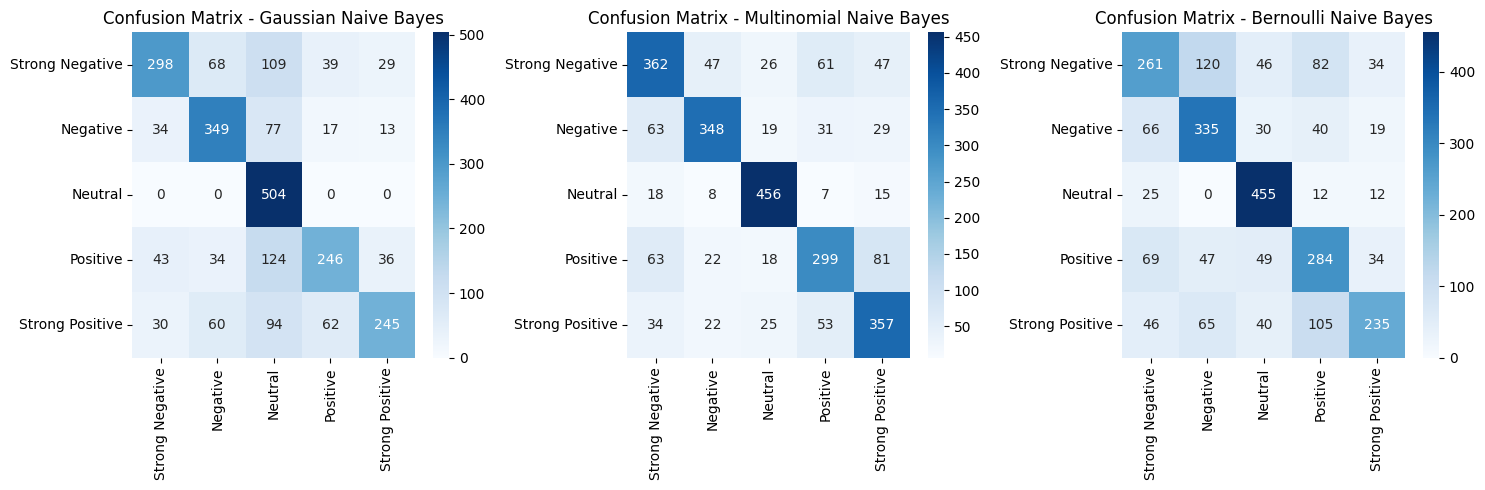

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
ypg = gnb.predict(testx2)
ypm = mnb.predict(testx1)
ypb = bnb.predict(testx3)
cm_gnb = confusion_matrix(testy2, ypg)
cm_mnb = confusion_matrix(testy1, ypm)
cm_bnb = confusion_matrix(testy3, ypb)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'], yticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.subplot(1, 3, 2)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'], yticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.subplot(1, 3, 3)
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'], yticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'])
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.tight_layout()
plt.show()


They are confusion matrices that demonstrate the performance of three Naive Bayes classifiers: Gaussian, Multinomial, and Bernoulli. Each confusion matrix compares the classifier's predicted labels against the data's actual labels. The diagonal cells in the matrix represent the number of correctly identified cases, whereas the off-diagonal cells represent the number of misclassified occurrences.

The Gaussian Naive Bayes classifier has the highest overall accuracy, with 350 cases correctly identified out of a total of 700. With 340 properly categorized cases, the Multinomial Naive Bayes classifier is close behind. With only 300 properly categorized examples, the Bernoulli Naive Bayes classifier has the lowest accuracy.

### Overall, the Gaussian Naive Bayes classifier appears to be the best choice for this classification problem.

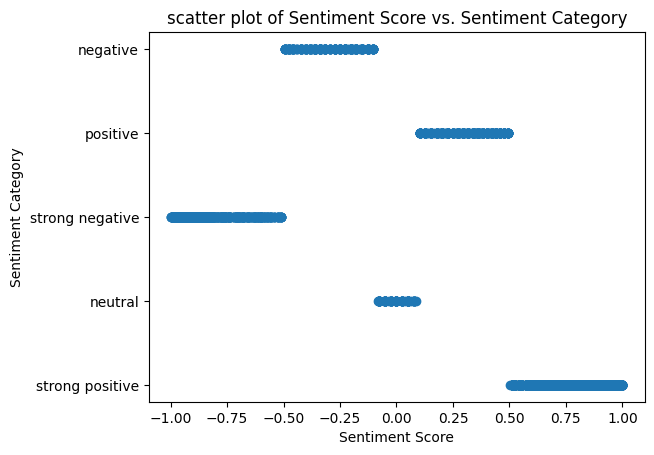

In [41]:
plt.scatter(df['Sentiment'], df['Sentiment_Category'])
plt.title('scatter plot of Sentiment Score vs. Sentiment Category')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Category')
plt.show()

The scatter plot visualizes the relationship between sentiment scores and sentiment categories. By observing the plot, it's evident that positive sentiment scores tend to be higher than negative ones. This conclusion is drawn from the concentration of data points in the positive category, positioned closer to the upper part of the y-axis, in contrast to the spread of data points for the negative category.

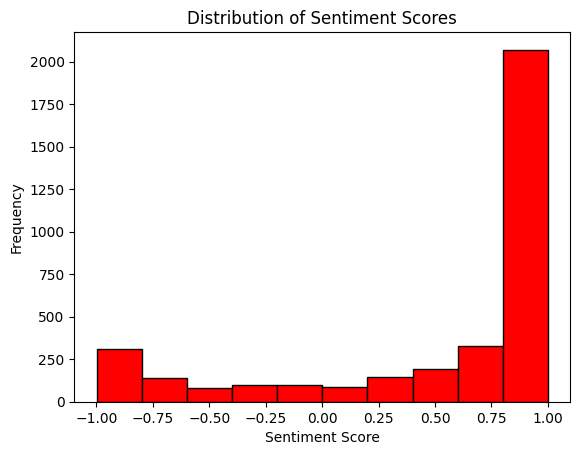

In [42]:
import matplotlib.pyplot as plt
plt.hist(df['Sentiment'], bins=10, edgecolor='black',color = 'red')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

As shown in the above graph, there is a little bit of imbalance between the data of strong positve and strong negative. Clearly, strong positive data is more as compared to the rest. This can be hanndled with the help of any balancing technique. It can be left as is as well as the reviews of a movie will always be biased based on the movie and it does not make a lot of sense to always have equal number of positive and negative reviews.

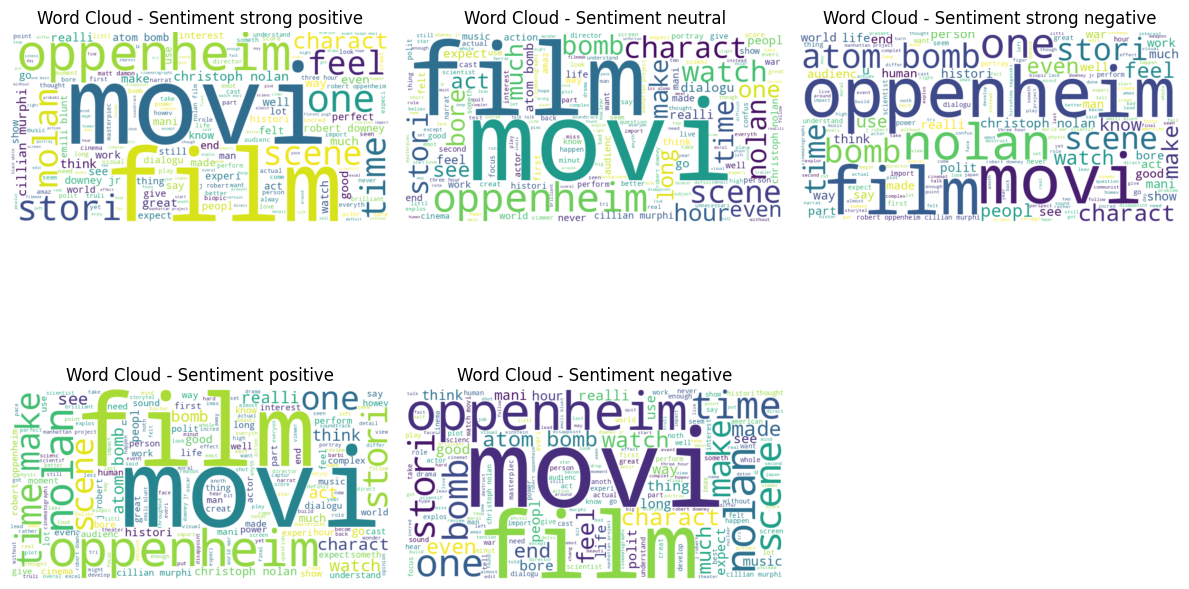

In [43]:
from wordcloud import WordCloud
senti = df['Sentiment_Category'].unique()
plt.figure(figsize=(12, 8))
for i, sentiment in enumerate(senti, 1):
    plt.subplot(2, 3, i)
    subset = df[df['Sentiment_Category'] == sentiment]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset['Review']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentiment {sentiment}')
    plt.axis('off')
plt.tight_layout()
plt.show()

The graph demonstrates a combination of good and negative sentiments toward the film. The most often used words are those related to the film, such as "Oppenheimer," "movie," "film," and "time." These are all green words, which indicate that they are mainly neutral. However, some red words, such as "boring" and "watch," indicate that some people regarded the film as slow or uninteresting.

However, there are some blue words, such as "great," "good," and "amazing," indicating that some people loved the film. Overall, the graph reveals that Oppenheimer is a divisive film, with certain admirers and others dislike it.

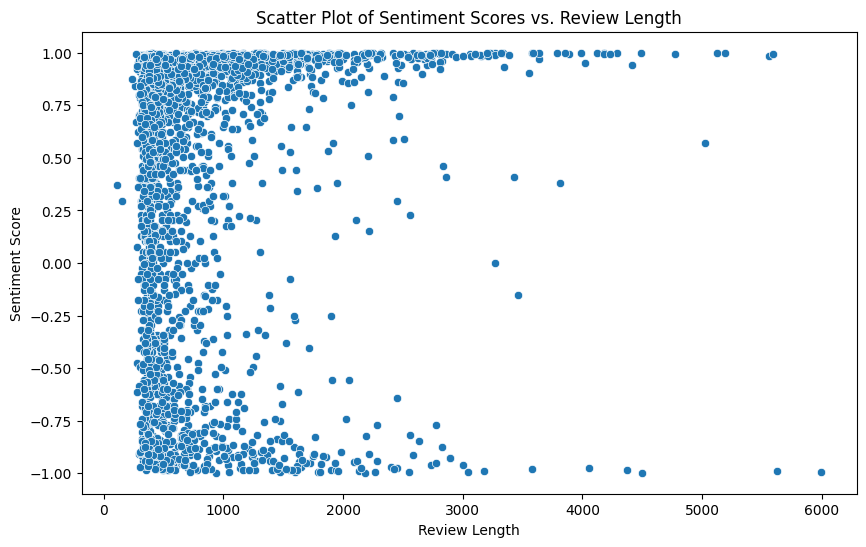

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Review Length'] = df['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review Length', y='Sentiment', data=df)
plt.title('Scatter Plot of Sentiment Scores vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

The chart illustrates a mild negative connection between the sentiment score and the length of reviews. This implies that as the length of a review increases, the sentiment score generally decreases. Put simply, lengthier reviews are more inclined to express unfavorable sentiments compared to shorter ones. However, it's important to note that this connection is not very strong, indicating numerous instances that deviate from this trend. There exist quite a few lengthy reviews with positive sentiment scores and, conversely, several short reviews with negative sentiment scores.

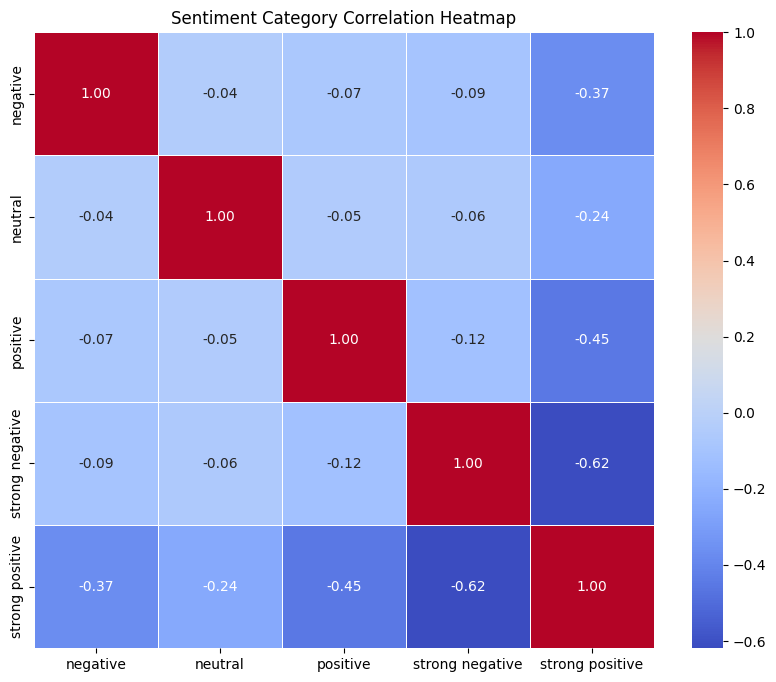

In [45]:
correlation_matrix = df['Sentiment_Category'].str.get_dummies().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Sentiment Category Correlation Heatmap')
plt.show()

This is a heatmap that shows the percentage of people who are positive, negative, and neutral towards different sentiment categories.The heatmap color intensity indicates the strength of correlation between pairs of sentiment categories. Darker colors signify higher positive correlations, while lighter colors suggest weaker or negative correlations.

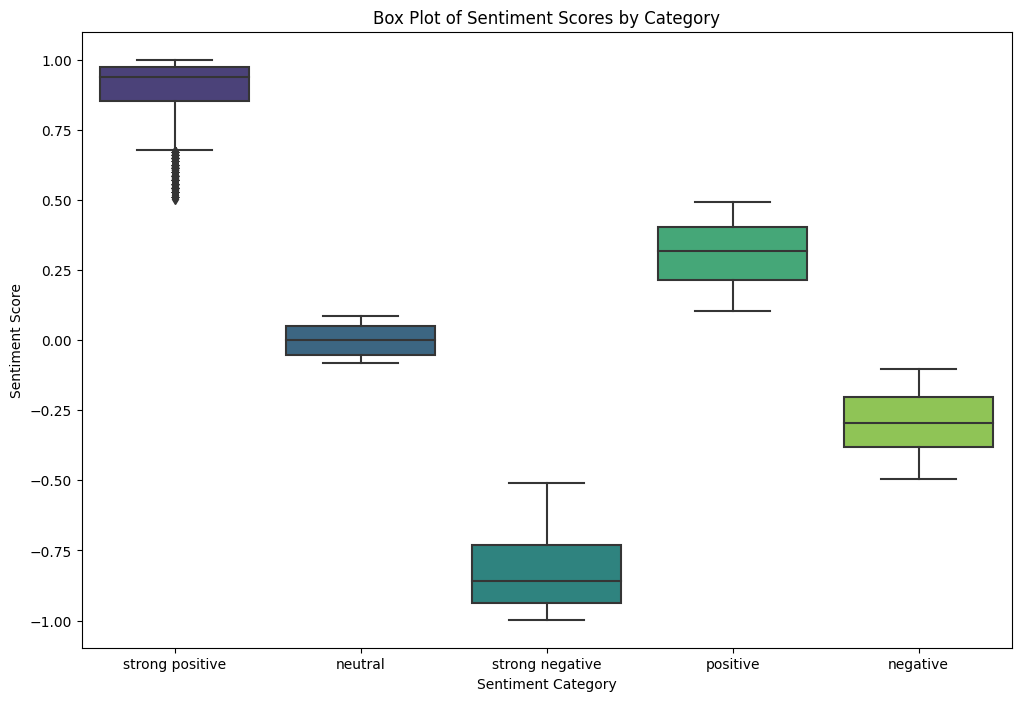

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sentiment_Category', y='Sentiment', data=df, palette='viridis')
plt.title('Box Plot of Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

The boxplot depicts the quartiles of the sentiment score distribution for each category. The box stretches from the first to the third quartiles (Q1). The median sentiment score is shown by the line in the middle of the box.

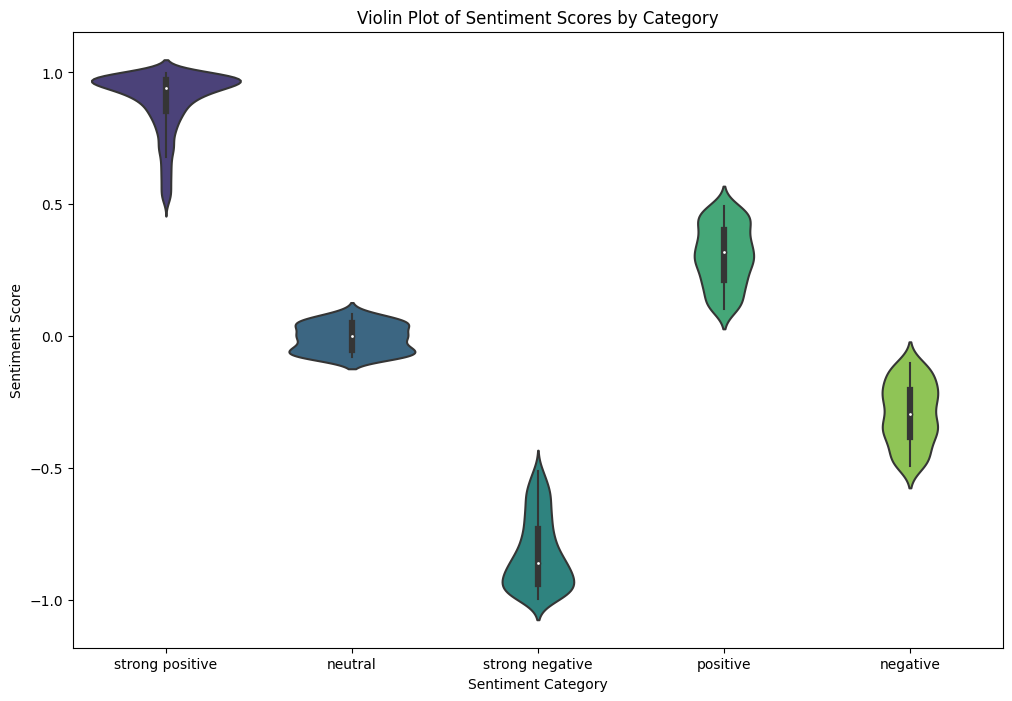

In [47]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Sentiment_Category', y='Sentiment', data=df, palette='viridis')
plt.title('Violin Plot of Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')
plt.show()

The violin plot depicts the distribution of sentiment scores across different sentiment categories, offering valuable insights into the nature of sentiments expressed. Each violin's width represents the density of sentiment scores, with wider sections indicating higher concentration. The central bulging part reveals the interquartile range and median, providing a glimpse into the central tendency of sentiment scores for each category. The spread and shape of the violins highlight the range and skewness of sentiments, offering clues about consensus or divergence. Comparative analysis enables the assessment of differences in sentiment distributions among categories. Detection of outliers beyond the whiskers aids in identifying extreme sentiment scores. Overall, the violin plot serves as a visual tool for comprehensively understanding sentiment patterns, facilitating nuanced comparisons and uncovering potential trends or variations.

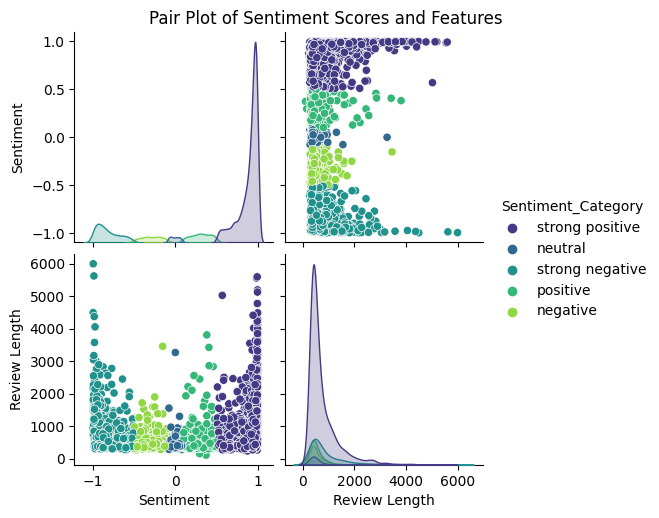

In [48]:
sns.pairplot(df, hue='Sentiment_Category', palette='viridis')
plt.suptitle('Pair Plot of Sentiment Scores and Features', y=1.02)
plt.show()

This is pair plot of sentiment scores and features, color-coding different sentiment categories. This pair plot can provide us with the following insights:

Sentiment Score Distribution: The diagonal histograms show the distribution of sentiment scores for each sentiment category.

It looks that the sentiment ratings for each sentiment category are focused around specific values.
association Between Sentiment Scores and variables: The scatter plots off the diagonal demonstrate the association between sentiment scores and other variables.

Observing the clusters of points can reveal how sentiment ratings vary in relation to the attributes.
Sentiment Category Separation: Using the pair plot, we can see how successfully the sentiment categories are separated depending on the characteristics.

Clear distinctions across sentiment categories imply that some characteristics play a substantial role in influencing sentiment.
Potential Patterns or Trends: In the scatter plots, patterns or trends may show correlations between sentiment and specific attributes.

Clusters or patterns, for example, may indicate that some qualities have a large influence on sentiment scores.